In [1]:
import nltk

In [3]:
# nltk.download_shell()

In [4]:
message = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
message[9]

'spam\tHad your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'

In [109]:
# for message_no,message in enumerate(message):
#     print(message_no,message)
#     print('\n')

In [7]:
import pandas as pd

In [8]:
msg_df = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [9]:
msg_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
msg_df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
msg_df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
msg_df['length'] = msg_df['message'].apply(len)

In [14]:
msg_df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

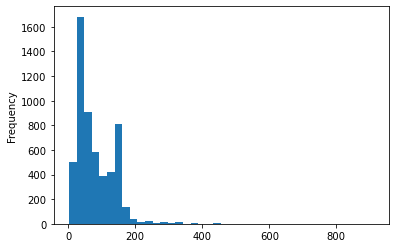

In [19]:
msg_df['length'].plot.hist(bins=40)

In [28]:
msg_df[msg_df['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [27]:
type(msg_df[msg_df['length'] == 910]['message'])

pandas.core.series.Series

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1CFFCF460>,
      dtype=object)

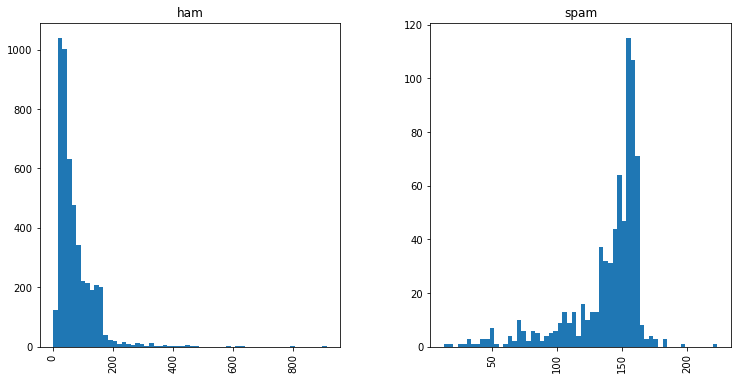

In [29]:
msg_df.hist(column='length',by='label',bins=60,figsize=(12,6))

In [30]:
import string

In [48]:
mess = 'Sample Message! Notice: it has punctuation.'

In [49]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
nopunc = [x for x in mess if x not in string.punctuation]

In [51]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [35]:
from nltk.corpus import stopwords

In [36]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [52]:
nopunc = ''.join(nopunc)

In [53]:
nopunc

'Sample Message Notice it has punctuation'

In [54]:
nopunc.split()

['Sample', 'Message', 'Notice', 'it', 'has', 'punctuation']

In [58]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [66]:
clean_mess
import time

In [73]:
# now make a function to do above work
def clean_text(msg):
    nopunc = [q for q in msg if q not in string.punctuation]
    nopunc = ''.join(nopunc)
    c_m = [w for w in nopunc.split() if w.lower() not in stopwords.words('english')]
    return c_m


In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
s = time.time()
bow_transform = CountVectorizer(analyzer=clean_text).fit(msg_df['message'])
st = time.time()
print(st-s )

30.602461338043213


In [63]:
bow_transform

CountVectorizer(analyzer=<function clean_text at 0x000001D1D3536EE0>)

In [76]:
print(len(bow_transform.vocabulary_))

11425


In [78]:
print(msg_df['message'][123])

Todays Voda numbers ending 7548 are selected to receive a $350 award. If you have a match please call 08712300220 quoting claim code 4041 standard rates app


In [79]:
x = time.time()

message_bow = bow_transform.transform(msg_df['message'])

y = time.time()
print(y-x )

31.532188892364502


In [82]:
print('Shape of Sparse Matrix' , message_bow.shape)

Shape of Sparse Matrix (5572, 11425)


In [85]:
nonZero=message_bow.nnz
# non zero occurences

In [86]:
sparsity = (100*nonZero/(message_bow.shape[0]*message_bow.shape[1]))

print(f'Sparsity is {sparsity}')

Sparsity is 0.07940295412668218


In [87]:
from sklearn.feature_extraction.text import TfidfTransformer

In [88]:
tfidtransformer = TfidfTransformer().fit(message_bow)

In [93]:
messages_tfidf = tfidtransformer.transform(message_bow)

In [90]:
tfidtransformer.idf_[bow_transform.vocabulary_['university']]

8.527076498901426

In [92]:
from sklearn.naive_bayes import MultinomialNB

In [94]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,msg_df['label'])

In [95]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [96]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
msg_train,msg_test,label_train,label_test=train_test_split(msg_df['message'],msg_df['label'],test_size=0.3)

In [99]:
from sklearn.pipeline import Pipeline

In [101]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=clean_text)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [102]:
x = time.time()
pipeline.fit(msg_train,label_train)
y = time.time()
print(y-x)

23.067601442337036


In [105]:
predictions = pipeline.predict(msg_test)

In [106]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1448
        spam       1.00      0.68      0.81       224

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672



In [108]:
x = time.time()
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=clean_text)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

pipeline.fit(msg_train,label_train)

predictions = pipeline.predict(msg_test)
print(classification_report(label_test,predictions))







y = time.time()
print(y-x)

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       0.99      0.76      0.86       224

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672

36.59597730636597
